In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os

cwd = os.getcwd()
print(cwd)

!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip -d /content/furniture
!unzip /content/drive/Shared\ drives/scsa_2019_b/Project_Ai-KEA/data_resize/room.zip -d /content

/content
Archive:  /content/drive/Shared drives/scsa_2019_b/Project_Ai-KEA/data_resize/furniture.zip
   creating: /content/furniture/bed/
  inflating: /content/furniture/bed/bed (1).jpg  
  inflating: /content/furniture/bed/bed (10).jpg  
  inflating: /content/furniture/bed/bed (100).jpg  
  inflating: /content/furniture/bed/bed (1000).jpg  
  inflating: /content/furniture/bed/bed (1001).jpg  
  inflating: /content/furniture/bed/bed (1002).jpg  
  inflating: /content/furniture/bed/bed (1003).jpg  
  inflating: /content/furniture/bed/bed (1004).jpg  
  inflating: /content/furniture/bed/bed (1005).jpg  
  inflating: /content/furniture/bed/bed (1006).jpg  
  inflating: /content/furniture/bed/bed (1007).jpg  
  inflating: /content/furniture/bed/bed (1008).jpg  
  inflating: /content/furniture/bed/bed (1009).jpg  
  inflating: /content/furniture/bed/bed (101).jpg  
  inflating: /content/furniture/bed/bed (1010).jpg  
  inflating: /content/furniture/bed/bed (1011).jpg  
  inflating: /content

In [3]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

file_dir = '/content/furniture/'

def imageMerge(file_path_1, file_path_2, debug=True): # format : '/content/furniture/chair'

	num = 0
	cls_1 = file_path_1.split(sep='/')[-1]
	cls_2 = file_path_2.split(sep='/')[-1]
	cls_name = cls_1+'_'+cls_2
	
	save_path = file_dir+cls_name
	os.makedirs(save_path, exist_ok=True)

	files1 = [ item for item in glob.glob(file_path_1 + '/*.jpg')][:4]
	files2 = [ item for item in glob.glob(file_path_2 + '/*.jpg')][:4]
	print(files1)
	for i in files1:
		img1 = image.load_img(i)
		if debug is True : plt.imshow(img1)
		for j in files2:
			img2 = image.load_img(j)
			if debug is True : plt.imshow(img2)
			w = min([img1.size[0], img2.size[0]])
			h = min([img1.size[1], img2.size[1]])

			if debug is True : print(w, h)
			resized_1 = img1.resize((w, h))
			resized_2 = img2.resize((w, h))
   
			if debug is True: 
						plt.imshow(resized_2)
			new_img = Image.new('RGB', (w*2, h), 'black')
			plt.imshow(new_img)
			
			if debug is True : 
						print(new_img.size)
						print(type(new_img), type(img2), type(resized_2))
			new_img.paste(resized_1, (0, 0))
			new_img.paste(resized_2, (w, 0))
			#save_path = 
			new_img.save(save_path+'/'+cls_name+'_'+str(num)+'.jpg')
			num+=1
			if debug is True : plt.imshow(new_img)

['/content/furniture/sofa/sofa (920).jpg', '/content/furniture/sofa/sofa (1209).jpg', '/content/furniture/sofa/sofa (991).jpg', '/content/furniture/sofa/sofa (763).jpg']
183 275
(366, 275)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
100 99
(200, 99)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
307 307
(614, 307)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
300 225
(600, 225)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
183 157
(366, 157)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
100 99
(200, 99)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
307 157
(614, 157)
<class 'PIL.Image.Image'> <class 'PIL.JpegImagePlugin.JpegImageFile'> <class 'PIL.Image.Image'>
300 157
(600, 157)
<class 'PI

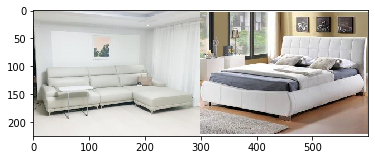

In [4]:
imageMerge('/content/furniture/sofa', '/content/furniture/bed', debug=True)
